In [204]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

In [205]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

**Define Temperature**

c:\anaconda3\envs\pyenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


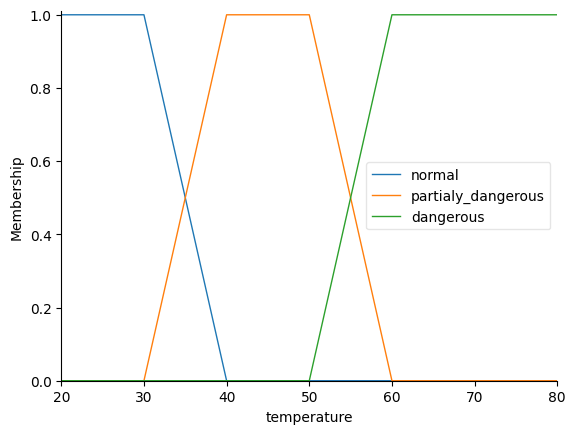

In [206]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

**Define Smoke**

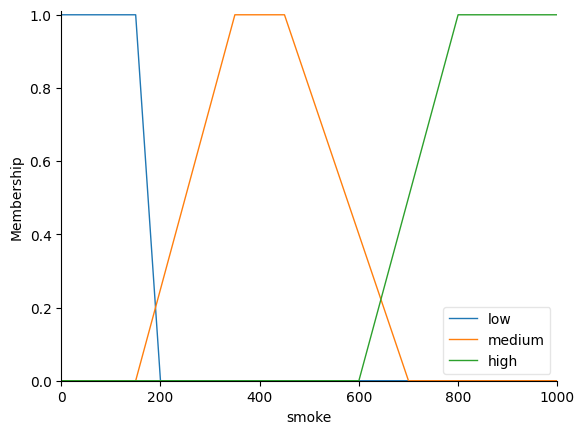

In [207]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

**Define Fire**

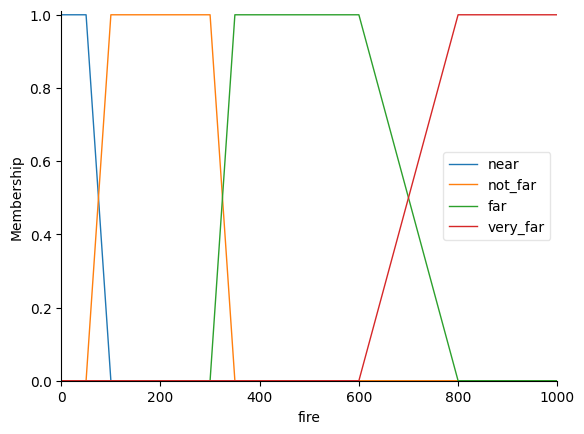

In [208]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

**Define Pump Speed**

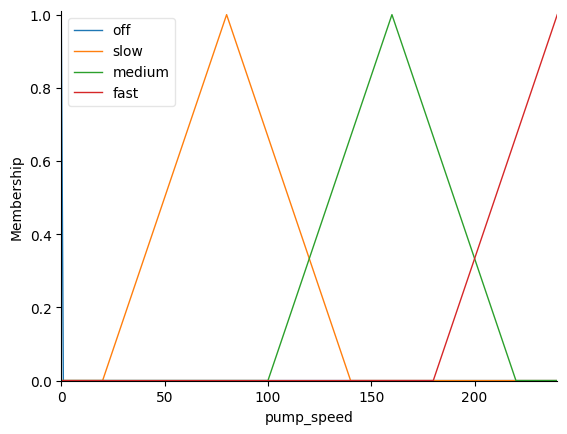

In [209]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

**Define Rules**

In [210]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

**Membership Value**

In [211]:
def inferences(storage=[], temp=0, smk=0, fr=0):
    temperature_inf = storage.copy()
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['partialy_dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['normal'].mf, temp))

    smoke_inf = storage.copy()
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['low'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['medium'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['high'].mf, smk))

    fire_inf = storage.copy()
    fire_inf.append(skf.interp_membership(fire.universe, fire['very_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['not_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['near'].mf, fr))

    return [temperature_inf, smoke_inf, fire_inf]

**Find z value**

In [212]:
def z_slow(fire, smoke):
    z1 = abs(fire - smoke - 250)
    return z1

def z_medium(a_pred, temperature):
    z1 = ((220-100)/2)*a_pred + temperature
    return z1

def z_fast():
    z1 = 230
    return z1

**Define Input**

In [213]:
input_temperature = 75
input_fire = 650
input_smoke = 320

**Sugeno Method**

In [214]:
from itertools import product

def sugeno(input_temperature, input_smoke, input_fire):
    inference = inferences(temp=input_temperature, smk=input_smoke, fr=input_fire)

    rule_inferences = [list(combination) for combination in product(*inference)]

    a_val = []
    z_val = []
    for idx, ri in enumerate(rule_inferences):
        a_pred = min(ri)
        if a_pred > 0:
            if 'pump_speed[off]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z_val.append(0)
            if 'pump_speed[slow]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_slow(fire=input_fire, smoke=input_smoke)
                z_val.append(z1*a_pred)
            if 'pump_speed[medium]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_medium(a_pred=a_pred, temperature=input_temperature)
                z_val.append(z1*a_pred)
            if 'pump_speed[fast]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_fast()
                z_val.append(z1*a_pred)

    output_action = sum(z_val)/sum(a_val)
    return output_action

output_action =  sugeno(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 110.0 m/s


**Visualization**

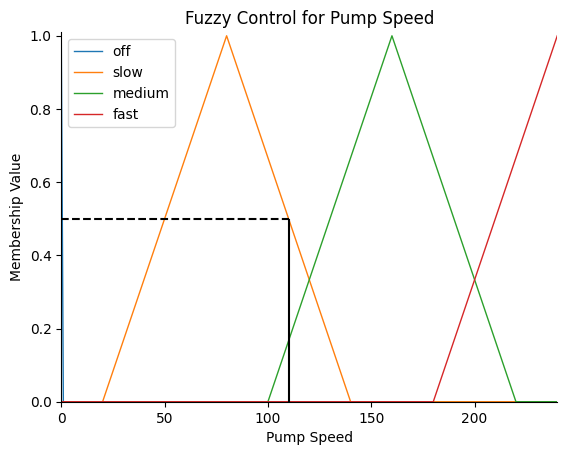

In [215]:
import matplotlib.pyplot as plt

def visualize(output_action):
    pump_speed.view()

    m_value = skf.interp_membership(pump_speed.universe, pump_speed['medium'].mf, output_action)
    m_value1 = skf.interp_membership(pump_speed.universe, pump_speed['slow'].mf, output_action)
    m_value2 = skf.interp_membership(pump_speed.universe, pump_speed['fast'].mf, output_action)
    m = max(m_value, m_value1, m_value2)
    plt.vlines(output_action, 0, m, colors='black')
    plt.hlines(m, 0, output_action, colors='black', linestyles='dashed')

    plt.xlabel("Pump Speed")
    plt.ylabel("Membership Value")
    plt.title("Fuzzy Control for Pump Speed")
    plt.legend()

    plt.show()

visualize(output_action)

In [216]:
import pandas as pd

input_data = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/input-data.xlsx', sheet_name='Input')
input_data

,Temperature,Smoke,Fire
0,48.2,193,43
1,40.0,300,900
2,35.0,150,320
3,65.0,450,50
4,75.0,700,650
5,35.0,50,950
6,40.0,50,700
7,65.0,100,400
8,75.0,50,50
9,35.0,750,50


**Export to Excel**

In [217]:
def process_data(input_data):
    output_data = []
    for row in range(input_data.shape[0]):
        input_temperature = input_data['Temperature'][row]
        input_smoke = input_data['Smoke'][row]
        input_fire = input_data['Fire'][row]
        output_action =  sugeno(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)

        output_data.append([input_temperature, input_smoke, input_fire, output_action])

    return pd.DataFrame(output_data, columns=['Temperature', 'Smoke', 'Fire', 'Output'])

In [218]:
output_data = process_data(input_data)
output_data.to_excel('sugeno.xlsx', sheet_name='sugeno', index=False)

In [219]:
import pandas as pd

excel_files = ['input-data.xlsx', 'tsukamoto.xlsx', 'mamdani.xlsx', 'sugeno.xlsx']

with pd.ExcelWriter('output-data.xlsx') as writer:
    for file in excel_files:
        df = pd.read_excel(file)
        sheet_name = file.split('.')[0]

        df.to_excel(writer, sheet_name=sheet_name, index=False)

output = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/output-data.xlsx', sheet_name='sugeno')
output

,Temperature,Smoke,Fire,Output
0,48.2,193,43,161.616901
1,40.0,300,900,0.000000
2,35.0,150,320,75.833333
3,65.0,450,50,230.000000
4,75.0,700,650,100.000000
5,35.0,50,950,0.000000
6,40.0,50,700,200.000000
7,65.0,100,400,125.000000
8,75.0,50,50,230.000000
9,35.0,750,50,147.500000
